In [181]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
from datetime import date, time, datetime
from operator import attrgetter
import pandas_profiling
import numpy as np

In [2]:
customers = pd.read_csv('data/customers_sample.csv', delimiter=';')
m_codes = pd.read_excel('data/merchant_codes_list.xls', sheet_name='MCC List', header=1, usecols=[0,1])
m_codes.rename(columns={'MCC CODE':'mcc_id', 'Program Type:':'program_type'}, inplace=True)
trans = pd.read_csv('data/transactional_data.csv')

C:\Users\Даниил\AppData\Local\Temp\ipykernel_21088\2443945083.py:1: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  customers = pd.read_csv('data/customers_sample.csv', delimiter=';')


In [3]:
customers.head()

uid1  customer_age country city_of_living registration_dt  \
0   8388.0          46.0  RUSSIA          Kazan      18.02.2017   
1  17264.0          20.0  RUSSIA     Sevastopol      21.07.2020   
2  17373.0          31.0  RUSSIA          Kazan      26.02.2016   
3  26297.0          27.0  RUSSIA     Sevastopol      25.01.2018   
4  27044.0          41.0  RUSSIA     Sevastopol      17.07.2015   

  website_last_visit_date  email  has_mob_app  phone_number  push  
0              01.05.2019    0.0          0.0           1.0   0.0  
1              03.10.2021    0.0          0.0           1.0   0.0  
2              24.12.2018    0.0          1.0           1.0   0.0  
3              16.04.2018    0.0          1.0           1.0   1.0  
4              30.07.2016    0.0          0.0           0.0   0.0

In [4]:
customers['country'].unique()

array(['RUSSIA', nan], dtype=object)

In [5]:
m_codes.head()

mcc_id                                     program_type
0   742.0                              Veterinary Services
1   763.0                        Agricultural Cooperatives
2   780.0           Landscaping and Horticultural Services
3  1520.0          General Contractor/Residential Building
4  1711.0  Heating, Plumbing, Air Conditioning Contractors

In [6]:
trans.head()

uid1    date_pur  mcc_id  transaction_amt  transaction_qty
0  14164181  2020-09-10    5499           418.00                1
1  15453249  2020-08-10    5541          1034.00                1
2  41571339  2020-09-12    5411            57.98                1
3   2044223  2021-06-28    5921           549.40                4
4  33493259  2020-07-20    4121           578.00                2

In [7]:
print('customers', customers.shape)
print('transactions', trans.shape)

customers (1048575, 10)
transactions (4710501, 5)


In [8]:
customers.drop_duplicates(inplace=True)
customers.drop_duplicates(subset=['uid1'])
customers.dropna(subset=['uid1'], inplace=True)
customers.shape

(10000, 10)

In [9]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4710501 entries, 0 to 4710500
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   uid1             int64  
 1   date_pur         object 
 2   mcc_id           int64  
 3   transaction_amt  float64
 4   transaction_qty  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 179.7+ MB


In [10]:
trans.dropna(inplace=True)
trans.shape

(4710501, 5)

In [11]:
trans_mcc = pd.merge(trans, m_codes, on='mcc_id', how ='left')
trans_mcc.head()

uid1    date_pur  mcc_id  transaction_amt  transaction_qty  \
0  14164181  2020-09-10    5499           418.00                1   
1  15453249  2020-08-10    5541          1034.00                1   
2  41571339  2020-09-12    5411            57.98                1   
3   2044223  2021-06-28    5921           549.40                4   
4  33493259  2020-07-20    4121           578.00                2   

                                        program_type  
0  Miscellaneous Food Stores-Convenience Stores a...  
1  Service Stations (with or without Ancillary Se...  
2                    Grocery Stores and Supermarkets  
3             Package Stores--Beer, Wine, and Liquor  
4                            Taxicabs and Limousines

In [12]:
trans_mcc.shape

(4710501, 6)

In [13]:
df = pd.merge(trans_mcc, customers, on='uid1', how='left')
df.head()

uid1    date_pur  mcc_id  transaction_amt  transaction_qty  \
0  14164181  2020-09-10    5499           418.00                1   
1  15453249  2020-08-10    5541          1034.00                1   
2  41571339  2020-09-12    5411            57.98                1   
3   2044223  2021-06-28    5921           549.40                4   
4  33493259  2020-07-20    4121           578.00                2   

                                        program_type  customer_age country  \
0  Miscellaneous Food Stores-Convenience Stores a...          50.0  RUSSIA   
1  Service Stations (with or without Ancillary Se...          63.0  RUSSIA   
2                    Grocery Stores and Supermarkets          22.0  RUSSIA   
3             Package Stores--Beer, Wine, and Liquor          33.0  RUSSIA   
4                            Taxicabs and Limousines          24.0  RUSSIA   

  city_of_living registration_dt website_last_visit_date  email  has_mob_app  \
0         Samara      05.12.2017              14.12.2019    1.0          1.0   
1           Perm      07.11.2017              08.05.2019    0.0          0.0   
2   Novokuznetsk      13.11.2019              06.09.2020    0.0          1.0   
3       Voronezh      13.10.2018              08.05.2020    0.0          0.0   
4       Voronezh      30.09.2016              27.07.2018    1.0          0.0   

   phone_number  push  
0           1.0   1.0  
1           1.0   0.0  
2           1.0   1.0  
3           1.0   0.0  
4           1.0   0.0

In [14]:
df.shape

(4710501, 15)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4710501 entries, 0 to 4710500
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   uid1                     int64  
 1   date_pur                 object 
 2   mcc_id                   int64  
 3   transaction_amt          float64
 4   transaction_qty          int64  
 5   program_type             object 
 6   customer_age             float64
 7   country                  object 
 8   city_of_living           object 
 9   registration_dt          object 
 10  website_last_visit_date  object 
 11  email                    float64
 12  has_mob_app              float64
 13  phone_number             float64
 14  push                     float64
dtypes: float64(6), int64(3), object(6)
memory usage: 575.0+ MB


In [16]:
df = df[['uid1', 'city_of_living', 'customer_age', 'registration_dt', \
          'website_last_visit_date', 'email', 'has_mob_app', 'phone_number', 'push', \
          'date_pur', 'program_type', 'transaction_amt', 'transaction_qty']]

In [56]:
#number of customers in analysis
len(df['uid1'].drop_duplicates())

9198

In [17]:
df.head()

uid1 city_of_living  customer_age registration_dt  \
0  14164181         Samara          50.0      05.12.2017   
1  15453249           Perm          63.0      07.11.2017   
2  41571339   Novokuznetsk          22.0      13.11.2019   
3   2044223       Voronezh          33.0      13.10.2018   
4  33493259       Voronezh          24.0      30.09.2016   

  website_last_visit_date  email  has_mob_app  phone_number  push    date_pur  \
0              14.12.2019    1.0          1.0           1.0   1.0  2020-09-10   
1              08.05.2019    0.0          0.0           1.0   0.0  2020-08-10   
2              06.09.2020    0.0          1.0           1.0   1.0  2020-09-12   
3              08.05.2020    0.0          0.0           1.0   0.0  2021-06-28   
4              27.07.2018    1.0          0.0           1.0   0.0  2020-07-20   

                                        program_type  transaction_amt  \
0  Miscellaneous Food Stores-Convenience Stores a...           418.00   
1  Service Stations (with or without Ancillary Se...          1034.00   
2                    Grocery Stores and Supermarkets            57.98   
3             Package Stores--Beer, Wine, and Liquor           549.40   
4                            Taxicabs and Limousines           578.00   

   transaction_qty  
0                1  
1                1  
2                1  
3                4  
4                2

In [126]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Outcomes from profiling report:
- We have some incorrect values in customer age column (min 11, max 221). Let's filter only age between 15 till 80 years old
- we have a high correlation between has_mob_app and push, which is obvious
- need to check correlation between customer age and has_mob_app

In [140]:
df = df[df.customer_age.between(15,80)]

In [178]:
age_mob_corr = df[['uid1', 'customer_age', 'has_mob_app', 'push']]

In [179]:
age_mob_corr.head()

uid1  customer_age  has_mob_app  push
0  14164181          50.0          1.0   1.0
1  15453249          63.0          0.0   0.0
2  41571339          22.0          1.0   1.0
3   2044223          33.0          0.0   0.0
4  33493259          24.0          0.0   0.0

In [183]:
conditions = [
          df.customer_age.between(15,25),
          df.customer_age.between(26,40),
          df.customer_age.between(41,55),
          df.customer_age.between(56,80)          
]
values = [
          'under 25',
          'under 40',
          'under 55',
          'under 80'
]
age_mob_corr['age_cat'] = np.select(conditions, values)

C:\Users\Даниил\AppData\Local\Temp\ipykernel_21088\1359913098.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_mob_corr['age_cat'] = np.select(conditions, values)


In [184]:
age_mob_corr.head()

uid1  customer_age  has_mob_app  push   age_cat
0  14164181          50.0          1.0   1.0  under 55
1  15453249          63.0          0.0   0.0  under 80
2  41571339          22.0          1.0   1.0  under 25
3   2044223          33.0          0.0   0.0  under 40
4  33493259          24.0          0.0   0.0  under 25

In [186]:
age_mob_aggr = age_mob_corr.groupby('age_cat').agg({'uid1': lambda x: x.count(),
                                        'has_mob_app':lambda x: x.sum(),
                                        'push':lambda x: x.sum()})        

In [187]:
age_mob_aggr = age_mob_aggr.reset_index()

In [188]:
age_mob_aggr.head()

age_cat     uid1  has_mob_app      push
0  under 25   716099     373699.0  281732.0
1  under 40  2042228     795957.0  517863.0
2  under 55  1235718     377785.0  240696.0
3  under 80   700513     103826.0   50231.0

In [189]:
age_mob_aggr['mob_%'] = round(age_mob_aggr.has_mob_app / age_mob_aggr.uid1 * 100)
age_mob_aggr['push_%'] = round(age_mob_aggr.push / age_mob_aggr.uid1 * 100)


In [190]:
age_mob_aggr.head()

age_cat     uid1  has_mob_app      push  mob_%  push_%
0  under 25   716099     373699.0  281732.0   52.0    39.0
1  under 40  2042228     795957.0  517863.0   39.0    25.0
2  under 55  1235718     377785.0  240696.0   31.0    19.0
3  under 80   700513     103826.0   50231.0   15.0     7.0

What we expected, that older people use mobile app and push notifications less than younger generation

In [141]:
df['registration_dt'] = pd.to_datetime(df['registration_dt'], format="%d.%m.%Y", errors='coerce')
df['website_last_visit_date'] = pd.to_datetime(df['website_last_visit_date'], format="%d.%m.%Y", errors='coerce')
df['date_pur'] = pd.to_datetime(df['date_pur'], format="%Y-%m-%d", errors='coerce')
df['uid1'] = df['uid1'].astype('object')


C:\Users\Даниил\AppData\Local\Temp\ipykernel_21088\182393804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['registration_dt'] = pd.to_datetime(df['registration_dt'], format="%d.%m.%Y", errors='coerce')
C:\Users\Даниил\AppData\Local\Temp\ipykernel_21088\182393804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['website_last_visit_date'] = pd.to_datetime(df['website_last_visit_date'], format="%d.%m.%Y", errors='coerce')
C:\Users\Даниил\AppData\Local\Temp\ipykernel_21088\182393804.py:3: Setting

Dataset description

For the segmentation we 
1. cleaned our data (customers and transactions) from the NULL values and from duplicated rows. 
2. joined 3 datasets in one denormilized dataset according
3. filtered only necessary in analysis columns

For geographcial segmentation:
- city_of_living
- country (was removed as we have only RUSSIA value) 

For Demographic segmentation:
- customer_age

For Behavioral segmentation:
- registration_dt
- website_last_visit_date
- email
- has_mob_app
- phone_number
- push
- date_pur
- transaction_amt 
- transaction_qty

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4694558 entries, 0 to 4710500
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   uid1                     object        
 1   city_of_living           object        
 2   customer_age             float64       
 3   registration_dt          datetime64[ns]
 4   website_last_visit_date  datetime64[ns]
 5   email                    float64       
 6   has_mob_app              float64       
 7   phone_number             float64       
 8   push                     float64       
 9   date_pur                 datetime64[ns]
 10  program_type             object        
 11  transaction_amt          float64       
 12  transaction_qty          int64         
 13  order_month              period[M]     
 14  cohort                   period[M]     
dtypes: datetime64[ns](3), float64(6), int64(1), object(3), period[M](2)
memory usage: 573.1+ MB


In [143]:
df.describe()

customer_age         email   has_mob_app  phone_number          push  \
count  4.694558e+06  4.694558e+06  4.694558e+06  4.694558e+06  4.694558e+06   
mean   3.950436e+01  2.485033e-01  3.517407e-01  9.973216e-01  2.322949e-01   
std    1.330703e+01  4.321452e-01  4.775136e-01  5.168411e-02  4.222961e-01   
min    1.500000e+01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.000000e+01  0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00   
50%    3.800000e+01  0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00   
75%    4.800000e+01  0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
max    8.000000e+01  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

       transaction_amt  transaction_qty  
count     4.694558e+06     4.694558e+06  
mean      7.656615e+02     1.198344e+00  
std       5.897129e+03     9.724476e-01  
min      -8.931200e+05    -9.400000e+01  
25%       1.000000e+02     1.000000e+00  
50%       2.926000e+02     1.000000e+00  
75%       7.300000e+02     1.000000e+00  
max       6.329780e+06     6.800000e+01

Cohort Analysis

In [144]:
df['order_month'] = df['date_pur'].dt.to_period('M')
df['cohort'] = df.groupby('uid1')['date_pur'] \
                 .transform('min') \
                 .dt.to_period('M') 

C:\Users\Даниил\AppData\Local\Temp\ipykernel_21088\2755499707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_month'] = df['date_pur'].dt.to_period('M')
C:\Users\Даниил\AppData\Local\Temp\ipykernel_21088\2755499707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cohort'] = df.groupby('uid1')['date_pur'] \


In [145]:
df_cohort = df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('uid1', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [146]:
df_cohort

cohort order_month  n_customers  period_number
0    2020-01     2020-01         6374              0
1    2020-01     2020-02         6154              1
2    2020-01     2020-03         6136              2
3    2020-01     2020-04         5985              3
4    2020-01     2020-05         5975              4
..       ...         ...          ...            ...
248  2021-08     2021-09          196              1
249  2021-08     2021-10          186              2
250  2021-09     2021-09          232              0
251  2021-09     2021-10          210              1
252  2021-10     2021-10           96              0

[253 rows x 4 columns]

In [147]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [148]:
cohort_pivot

period_number      0       1       2       3       4       5       6       7   \
cohort                                                                          
2020-01        6374.0  6154.0  6136.0  5985.0  5975.0  6029.0  6034.0  6032.0   
2020-02         244.0   188.0   172.0   178.0   182.0   174.0   178.0   182.0   
2020-03         171.0   131.0   130.0   126.0   129.0   131.0   127.0   127.0   
2020-04          92.0    74.0    73.0    69.0    68.0    69.0    66.0    66.0   
2020-05          89.0    72.0    67.0    69.0    69.0    68.0    61.0    68.0   
2020-06          75.0    60.0    57.0    59.0    60.0    55.0    54.0    55.0   
2020-07          93.0    78.0    77.0    79.0    73.0    76.0    73.0    77.0   
2020-08          92.0    78.0    77.0    73.0    75.0    77.0    76.0    79.0   
2020-09         111.0   100.0   100.0    99.0    96.0    93.0    98.0    94.0   
2020-10          96.0    86.0    84.0    80.0    81.0    82.0    82.0    76.0   
2020-11         160.0   150.0   146.0   146.0   146.0   145.0   144.0   143.0   
2020-12          83.0    71.0    69.0    71.0    72.0    73.0    72.0    69.0   
2021-01          62.0    60.0    59.0    57.0    58.0    58.0    53.0    54.0   
2021-02          98.0    97.0    94.0    93.0    92.0    92.0    90.0    89.0   
2021-03          98.0    93.0    87.0    86.0    83.0    87.0    86.0    81.0   
2021-04         157.0   147.0   147.0   145.0   140.0   143.0   131.0     NaN   
2021-05         112.0   101.0   105.0   103.0    98.0    89.0     NaN     NaN   
2021-06         153.0   145.0   142.0   140.0   132.0     NaN     NaN     NaN   
2021-07         165.0   151.0   153.0   145.0     NaN     NaN     NaN     NaN   
2021-08         214.0   196.0   186.0     NaN     NaN     NaN     NaN     NaN   
2021-09         232.0   210.0     NaN     NaN     NaN     NaN     NaN     NaN   
2021-10          96.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

period_number      8       9   ...      12      13      14      15      16  \
cohort                         ...                                           
2020-01        6019.0  6012.0  ...  5918.0  5879.0  5900.0  5902.0  5872.0   
2020-02         184.0   183.0  ...   184.0   184.0   189.0   187.0   180.0   
2020-03         128.0   135.0  ...   130.0   132.0   129.0   129.0   127.0   
2020-04          68.0    68.0  ...    65.0    64.0    68.0    68.0    65.0   
2020-05          65.0    64.0  ...    68.0    67.0    68.0    65.0    67.0   
2020-06          53.0    55.0  ...    55.0    56.0    59.0    55.0    50.0   
2020-07          72.0    71.0  ...    69.0    74.0    78.0    62.0     NaN   
2020-08          72.0    73.0  ...    75.0    71.0    60.0     NaN     NaN   
2020-09          90.0    92.0  ...    91.0    87.0     NaN     NaN     NaN   
2020-10          78.0    81.0  ...    72.0     NaN     NaN     NaN     NaN   
2020-11         144.0   145.0  ...     NaN     NaN     NaN     NaN     NaN   
2020-12          72.0    71.0  ...     NaN     NaN     NaN     NaN     NaN   
2021-01          54.0    48.0  ...     NaN     NaN     NaN     NaN     NaN   
2021-02          82.0     NaN  ...     NaN     NaN     NaN     NaN     NaN   
2021-03           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
2021-04           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
2021-05           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
2021-06           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
2021-07           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
2021-08           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
2021-09           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
2021-10           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   

period_number      17      18      19      20      21  
cohort                                                 
2020-01        5849.0  5803.0  5809.0  5812.0  5479.0  
2020-02       

In [149]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [150]:
print(retention_matrix)

period_number   0         1         2         3         4         5   \
cohort                                                                 
2020-01        1.0  0.965485  0.962661  0.938971  0.937402  0.945874   
2020-02        1.0  0.770492  0.704918  0.729508  0.745902  0.713115   
2020-03        1.0  0.766082  0.760234  0.736842  0.754386  0.766082   
2020-04        1.0  0.804348  0.793478  0.750000  0.739130  0.750000   
2020-05        1.0  0.808989  0.752809  0.775281  0.775281  0.764045   
2020-06        1.0  0.800000  0.760000  0.786667  0.800000  0.733333   
2020-07        1.0  0.838710  0.827957  0.849462  0.784946  0.817204   
2020-08        1.0  0.847826  0.836957  0.793478  0.815217  0.836957   
2020-09        1.0  0.900901  0.900901  0.891892  0.864865  0.837838   
2020-10        1.0  0.895833  0.875000  0.833333  0.843750  0.854167   
2020-11        1.0  0.937500  0.912500  0.912500  0.912500  0.906250   
2020-12        1.0  0.855422  0.831325  0.855422  0.867470  0.87

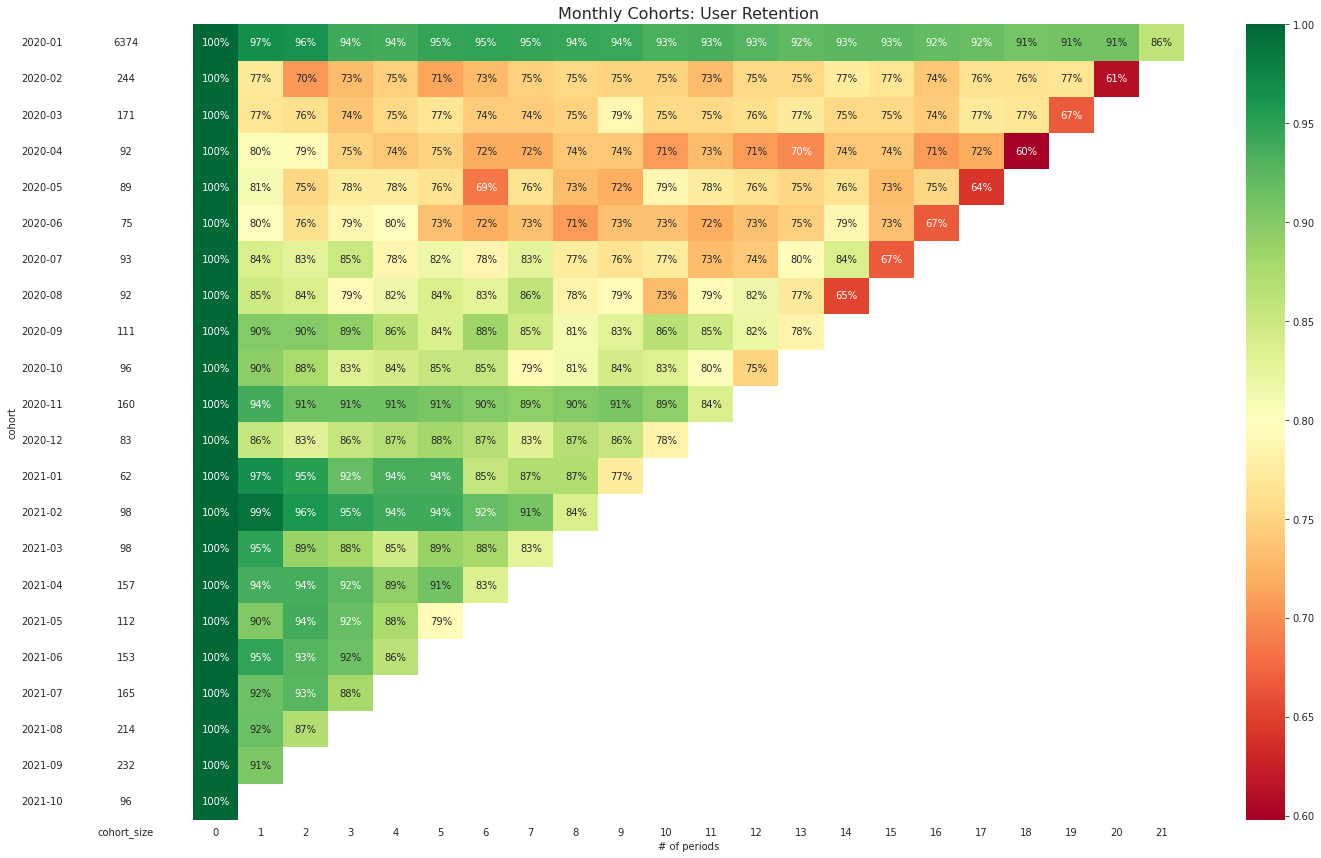

In [151]:
import matplotlib.colors as mcolors
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(20, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

RFM Segmentation Analysis

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4694558 entries, 0 to 4710500
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   uid1                     object        
 1   city_of_living           object        
 2   customer_age             float64       
 3   registration_dt          datetime64[ns]
 4   website_last_visit_date  datetime64[ns]
 5   email                    float64       
 6   has_mob_app              float64       
 7   phone_number             float64       
 8   push                     float64       
 9   date_pur                 datetime64[ns]
 10  program_type             object        
 11  transaction_amt          float64       
 12  transaction_qty          int64         
 13  order_month              period[M]     
 14  cohort                   period[M]     
dtypes: datetime64[ns](3), float64(6), int64(1), object(3), period[M](2)
memory usage: 573.1+ MB


In [153]:
present_date = dt.datetime(year=2022, month=10, day=14, hour=21, minute=20, second=36)

In [154]:
rfm_df = df.groupby('uid1').agg({'date_pur': lambda x: (present_date - x.max()).days, #recency
                                        'transaction_qty': lambda x: len(x), #frequency
                                        'transaction_amt': lambda x: x.sum(),
                                        'email': lambda x: x.min(),
                                        'has_mob_app': lambda x: x.min(),
                                        'phone_number': lambda x: x.min(),
                                        'push': lambda x: x.min()}) #monetary

In [155]:
rfm_df.columns=['recency','frequency','monetary', 'email', 'has_mob_app', 'phone_number', 'push']

In [156]:
#rfm_df.columns=['recency','frequency','monetary']

In [157]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9067 entries, 8388 to 52812230
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recency       9067 non-null   int64  
 1   frequency     9067 non-null   int64  
 2   monetary      9067 non-null   float64
 3   email         9067 non-null   float64
 4   has_mob_app   9067 non-null   float64
 5   phone_number  9067 non-null   float64
 6   push          9067 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 566.7 KB


In [158]:
quartiles = rfm_df.quantile(q=[0.25,0.50,0.75])

In [159]:
# Converting quantiles to a dictionary, easier to use.
quantiles = quartiles.to_dict()
##  RFM Segmentation ----
RFM_Segment = rfm_df.copy()
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['monetary'].apply(FM_Class, args=('monetary',quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

In [160]:
RFM_Segment.reset_index(inplace =True)

In [161]:
len(RFM_Segment['uid1'].drop_duplicates())

9067

In [162]:
RFM_Segment.head()

uid1  recency  frequency   monetary  email  has_mob_app  phone_number  \
0   8388      368        187  127141.34    0.0          0.0           1.0   
1  17264      371        452  153450.45    0.0          0.0           1.0   
2  17373      381        355  911493.93    0.0          1.0           1.0   
3  26297      367        459  174610.41    0.0          1.0           1.0   
4  27044      367        786  925225.73    0.0          0.0           0.0   

   push  R_Quartile  F_Quartile  M_Quartile RFMClass  
0   0.0           3           2           2      322  
1   0.0           2           3           2      232  
2   0.0           1           2           4      124  
3   1.0           4           3           2      432  
4   0.0           4           4           4      444

In [163]:
segments = RFM_Segment.groupby('RFMClass')['uid1'].count().sort_values(ascending=False)

In [164]:
segments = pd.DataFrame(segments).reset_index()

In [165]:
segments.head()

RFMClass  uid1
0      444  1219
1      111   990
2      433   608
3      422   466
4      411   463

In [166]:
segments.rename(columns = {'uid1':'customers_count'}, inplace=True)

In [167]:
segments.head()

RFMClass  customers_count
0      444             1219
1      111              990
2      433              608
3      422              466
4      411              463

In [168]:
segments['customers_percent'] = (segments['customers_count'] * 100 / segments['customers_count'].sum()).round()

In [169]:
segments.head()

RFMClass  customers_count  customers_percent
0      444             1219               13.0
1      111              990               11.0
2      433              608                7.0
3      422              466                5.0
4      411              463                5.0

In [170]:
RFM_Segment.head()

uid1  recency  frequency   monetary  email  has_mob_app  phone_number  \
0   8388      368        187  127141.34    0.0          0.0           1.0   
1  17264      371        452  153450.45    0.0          0.0           1.0   
2  17373      381        355  911493.93    0.0          1.0           1.0   
3  26297      367        459  174610.41    0.0          1.0           1.0   
4  27044      367        786  925225.73    0.0          0.0           0.0   

   push  R_Quartile  F_Quartile  M_Quartile RFMClass  
0   0.0           3           2           2      322  
1   0.0           2           3           2      232  
2   0.0           1           2           4      124  
3   1.0           4           3           2      432  
4   0.0           4           4           4      444

In [171]:
filter_444 = RFM_Segment['RFMClass'] == '444'

In [172]:
print('customers with email: ' + str(int(RFM_Segment['email'][filter_444].sum())) + ' which is ' + 
str(round(int(RFM_Segment['email'][filter_444].sum()) / RFM_Segment['uid1'][filter_444].count() * 100)) + '%' )

print('customers with mobile app: ' + str(int(RFM_Segment['has_mob_app'][filter_444].sum())) + ' which is ' +
str(round(int(RFM_Segment['has_mob_app'][filter_444].sum()) / RFM_Segment['uid1'][filter_444].count() * 100)) + '%')

print('customers with phone number: ' + str(int(RFM_Segment['phone_number'][filter_444].sum())) + ' which is ' +
str(int(RFM_Segment['phone_number'][filter_444].sum()) / RFM_Segment['uid1'][filter_444].count() * 100) + '%')

print('customers with push notifications: ' + str(int(RFM_Segment['push'][filter_444].sum())) + ' which is ' + 
str(round(int(RFM_Segment['push'][filter_444].sum()) / RFM_Segment['uid1'][filter_444].count() * 100)) + '%')

print('overall customers in segment:', RFM_Segment['uid1'][filter_444].count())

customers with email: 403 which is 33%
customers with mobile app: 507 which is 42%
customers with phone number: 1213 which is 99.50779327317474%
customers with push notifications: 335 which is 27%
overall customers in segment: 1219


In [173]:
filter_111 = RFM_Segment['RFMClass'] == '111'

In [174]:
print('customers with email: ' + str(int(RFM_Segment['email'][filter_111].sum())) + ' which is ' + 
str(round(int(RFM_Segment['email'][filter_111].sum()) / RFM_Segment['uid1'][filter_111].count() * 100)) + '%' )

print('customers with mobile app: ' + str(int(RFM_Segment['has_mob_app'][filter_111].sum())) + ' which is ' +
str(round(int(RFM_Segment['has_mob_app'][filter_111].sum()) / RFM_Segment['uid1'][filter_111].count() * 100)) + '%')

print('customers with phone number: ' + str(int(RFM_Segment['phone_number'][filter_111].sum())) + ' which is ' +
str(int(RFM_Segment['phone_number'][filter_111].sum()) / RFM_Segment['uid1'][filter_111].count() * 100) + '%')

print('customers with push notifications: ' + str(int(RFM_Segment['push'][filter_111].sum())) + ' which is ' + 
str(round(int(RFM_Segment['push'][filter_111].sum()) / RFM_Segment['uid1'][filter_111].count() * 100)) + '%')

print('overall customers in segment:', RFM_Segment['uid1'][filter_111].count())

customers with email: 174 which is 18%
customers with mobile app: 166 which is 17%
customers with phone number: 986 which is 99.5959595959596%
customers with push notifications: 94 which is 9%
overall customers in segment: 990


According to analysis of available communication channels, we can compare 2 different segments
- loyal customers with RFM segmentation 444
- non-loyal customers with RFM segmentation 111 

33% of loyal customers have email as an available channel, while only 18% of non-loyal customers have it

42% of loyal customers have mobile app as an available channel, while only 17% of non-loyal customers have it

both segments have a high percentage ~99.5% of customers with mobile phone available 

27% of loyal customers have push notifications as an available channel, while only 9% of non-loyal customers have it, which is 3 times lower.

We need to provide non-loyal customers communication channels availability to increase their loaylty


In [175]:
print('customers with email:', int(RFM_Segment['email'][RFM_Segment['RFMClass'] == '111'].sum()))
print('customers with mobile app:', int(RFM_Segment['has_mob_app'][RFM_Segment['RFMClass'] == '111'].sum()))
print('customers with phone number:', int(RFM_Segment['phone_number'][RFM_Segment['RFMClass'] == '111'].sum()))
print('customers with push notifications:', int(RFM_Segment['push'][RFM_Segment['RFMClass'] == '111'].sum()))
print('overall customers in segment:', RFM_Segment['uid1'][RFM_Segment['RFMClass'] == '111'].count())

customers with email: 174
customers with mobile app: 166
customers with phone number: 986
customers with push notifications: 94
overall customers in segment: 990


In [176]:
RFM_Segment.describe()

uid1      recency    frequency      monetary        email  \
count  9.067000e+03  9067.000000  9067.000000  9.067000e+03  9067.000000   
mean   2.665794e+07   388.726481   517.763097  3.964312e+05     0.193008   
std    1.519684e+07    78.199039   446.201915  7.003295e+05     0.394681   
min    8.388000e+03   367.000000     1.000000 -6.192339e+06     0.000000   
25%    1.350691e+07   367.000000   151.000000  8.256075e+04     0.000000   
50%    2.700506e+07   368.000000   420.000000  2.387668e+05     0.000000   
75%    3.970933e+07   371.000000   771.000000  4.966868e+05     0.000000   
max    5.281223e+07  1015.000000  3528.000000  2.694931e+07     1.000000   

       has_mob_app  phone_number         push   R_Quartile   F_Quartile  \
count  9067.000000   9067.000000  9067.000000  9067.000000  9067.000000   
mean      0.266351      0.997353     0.172052     2.861035     2.499173   
std       0.442074      0.051383     0.377447     1.252877     1.117947   
min       0.000000      0.000000     0.000000     1.000000     1.000000   
25%       0.000000      1.000000     0.000000     2.000000     1.000000   
50%       0.000000      1.000000     0.000000     3.000000     2.000000   
75%       1.000000      1.000000     0.000000     4.000000     3.000000   
max       1.000000      1.000000     1.000000     4.000000     4.000000   

        M_Quartile  
count  9067.000000  
mean      2.499945  
std       1.118145  
min       1.000000  
25%       1.500000  
50%       2.000000  
75%       3.500000  
max       4.000000

- 13% of the customers - our loyal clients with the highest rate of RFM
- 11% of our customers - we have risk to miss this customers, cause they have the lowest rate

Also, according to statistics above, we can say that 75% of the customers have high rate of recency (4) or lower, however frequency rate with 75% percentile is only 3 and lower. It gives us a way to improve our marketing strategy to increase the frequency of our customers

In [177]:
len(segments)

60